In [7]:
from neuralogic.nn import get_evaluator
from neuralogic.core import Template, R, Settings, Transformation, Combination, Aggregation
from neuralogic.core.constructs.function.tree import FunctionContainer
from neuralogic.core.settings import Settings
from neuralogic.dataset import Dataset
from neuralogic.optim import SGD

F = FunctionContainer()
dataset = Dataset()
template = Template()

In [8]:
dataset.add_example([R.a[3], R.b[5], R.c[2]])
dataset.add_queries([R.d[1]])

In [9]:
template += (R.d <= (x:=R.a, y:= R.b, z:=R.c)) >> F.avg[F.relu(x + y + z)]

# expression above has following eval order:
# R.a    ||   x:= R.b    ||     y:= R.c    ||     R.a <= ()   ||    x + y   ||    F.identity  ||    >>   ||   template +=

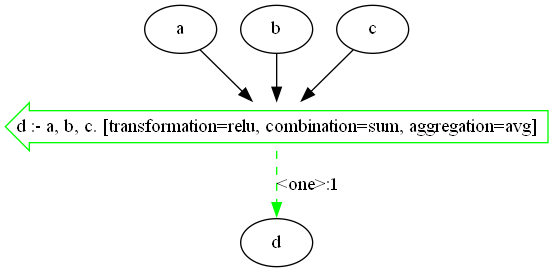

In [10]:
template.draw()

In [11]:
settings = Settings(optimizer=SGD(), epochs=1)
neuralogic_evaluator = get_evaluator(template, settings)
build_dataset = neuralogic_evaluator.build_dataset(dataset)

for _ in neuralogic_evaluator.train(dataset):
    pass



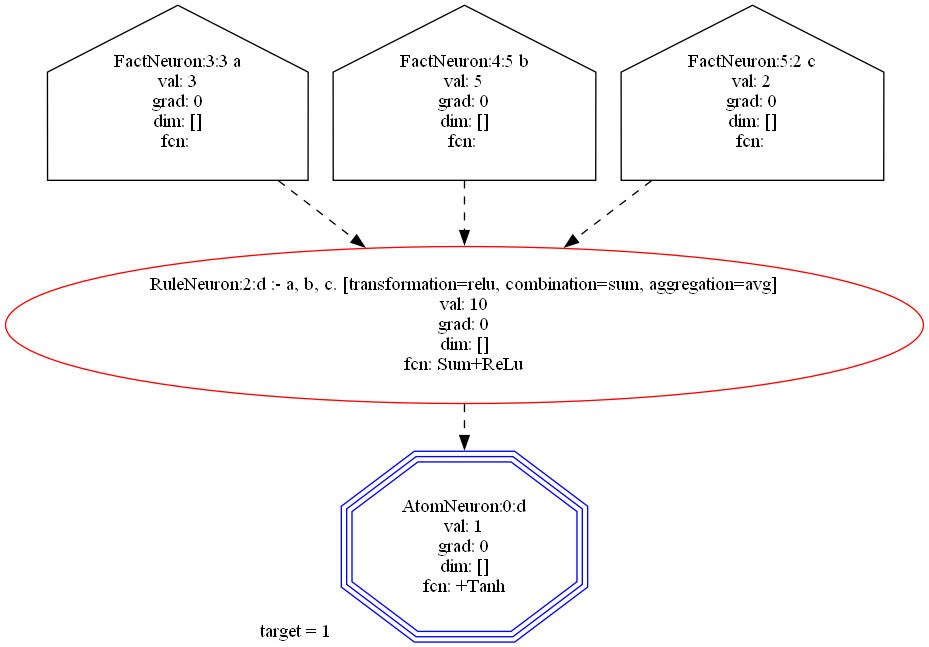

In [12]:
build_dataset[0].draw()